#Task 3: Heart Disease Prediction

## Objective
The objective of this task is to build a machine learning model that predicts
whether a person is at risk of heart disease based on medical attributes.

##Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score)

In [2]:
# Load Heart Disease dataset
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##Dataset Inspection

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset contains patient health records with numerical and categorical
features. The target variable indicates the presence or absence of heart disease.


###Data Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values were found in the dataset. Therefore, no imputation was required.


##Exploratory Data Analysis (EDA)

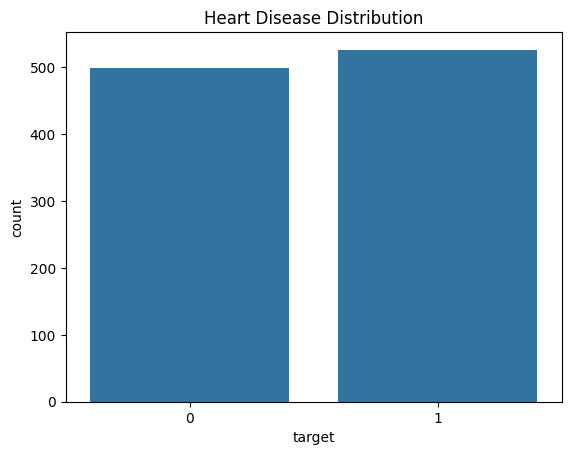

In [8]:
# Target Variable Distribution
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()

The dataset is reasonably balanced between patients with and without heart disease.

##Correlation Heatmap

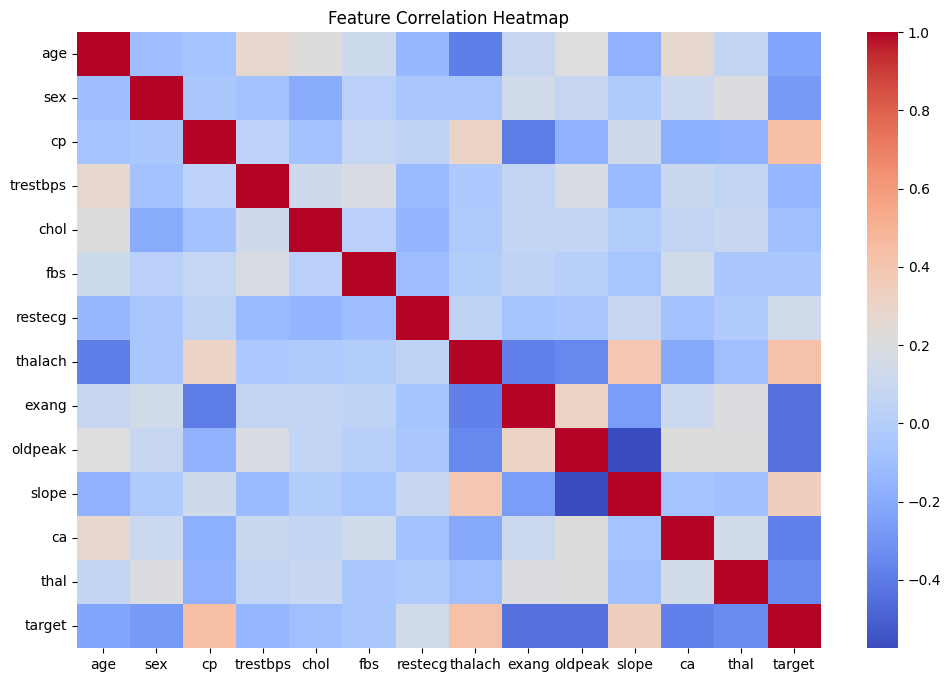

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows correlations between features and the target variable.
Features such as chest pain type, maximum heart rate, and oldpeak
show strong relationships with heart disease.

##Feature Selection and Train-Test Split

In [10]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Train Logistic Regression Model

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

###Model Predictions and Evaluation

In [13]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7951219512195122


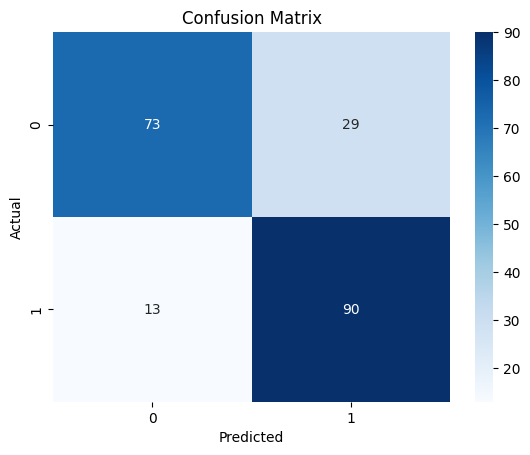

In [15]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Confusion Matrix

The confusion matrix shows the performance of the classification model by
comparing actual and predicted values.

- True Negatives (TN): 73  
- False Positives (FP): 29  
- False Negatives (FN): 13  
- True Positives (TP): 90  

The model correctly identifies most patients with heart disease.
False negatives are relatively low, which is important in medical
applications where missing a positive case can be critical.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



###ROC Curve and ROC-AUC

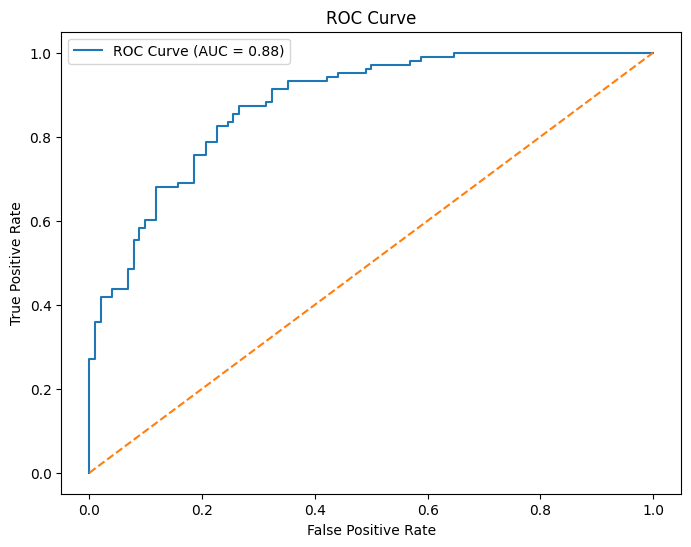

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## ROC Curve

The ROC (Receiver Operating Characteristic) curve illustrates the trade-off
between the True Positive Rate and the False Positive Rate.

The model achieved an AUC score of approximately **0.88**, indicating strong
discriminative ability. This means the model is effective at distinguishing
between patients with and without heart disease.

##Feature Importance Analysis

In [18]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance

,0
cp,0.885835
thalach,0.652826
slope,0.343605
restecg,0.140804
age,-0.006734
fbs,-0.062685
trestbps,-0.320053
exang,-0.420235
chol,-0.447276
thal,-0.656856


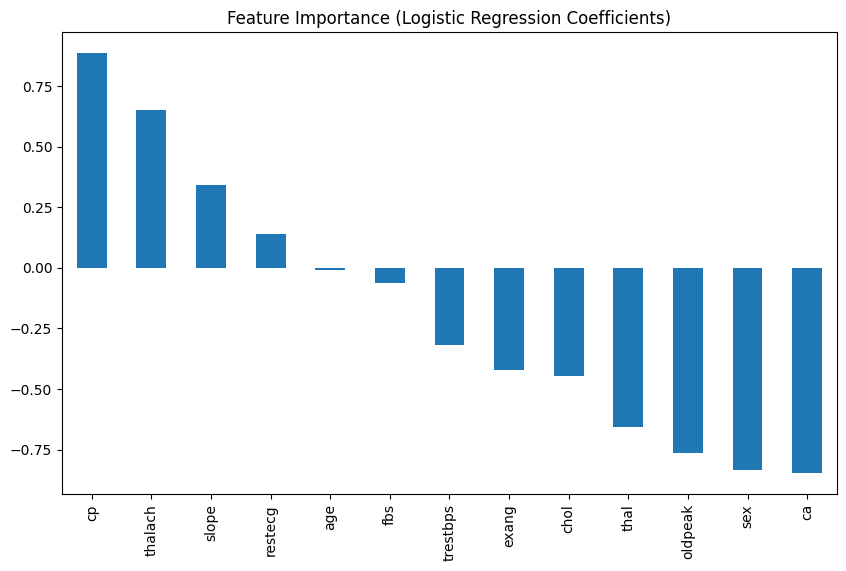

In [19]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

## Feature Importance (Logistic Regression Coefficients)

This plot shows the importance of features based on the magnitude and sign of
Logistic Regression coefficients.

- Positive coefficients increase the likelihood of heart disease.
- Negative coefficients decrease the likelihood.

Chest pain type (`cp`), maximum heart rate (`thalach`), and slope are the most
positively influential features.
Features such as `oldpeak`, `sex`, and `ca` have strong negative influence.

These features play a significant role in predicting heart disease risk.

The Logistic Regression model demonstrated strong performance in predicting
heart disease risk using patient health data.

Key highlights:
- Effective binary classification with high ROC-AUC score
- Meaningful medical feature interpretation
- Suitable for early risk assessment

While the model shows promising results, it should be used as a supportive tool
and not as a replacement for professional medical diagnosis.